# Data Input

connect to imdb datbase in keras

In [ ]:
from keras.datasets import imdb

Load the data by specifying the max vocabulary limit, unique words to be changed from text to numbers

In [ ]:
imdb.load_data

<function keras.datasets.imdb.load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)>

In [ ]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17473536/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


If you note the sequences are already tokenised 

In [ ]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


We are trying to get back the original form of sequence

In [ ]:

word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

1654784/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'm

Get the max tokens and min token in the whole sequence list 

In [ ]:
len_list=[]
for each in X_train:
  len_list.append(len(each))

for each in X_test:
  len_list.append(len(each))
  
max(len_list),min(len_list)

(2494, 7)

Limiting the length of each sequence & Expanding if it less (Padding)

In [ ]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

For verifying the padding

In [ ]:
len_list=[]
for each in X_train:
  len_list.append(len(each))

for each in X_test:
  len_list.append(len(each))
  
max(len_list),min(len_list)

(500, 500)

# Model

In [ ]:
len(X_train)

25000

In [ ]:

# Splitting the train sequences into traion and valiadation
from sklearn.model_selection import train_test_split as tts

X_tr, X_val, y_tr, y_val = tts(X_train, y_train,test_size=0.33, random_state=42)

In [ ]:
len(X_train),len(y_train)

(25000, 25000)

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32   # Each token or word is going to represented as a feature vector of size 32 
model_1=Sequential()
model_1.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model_1.add(LSTM(100))
model_1.add(Dense(1, activation='sigmoid'))

print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
model_1_history = model_1.fit(X_tr,y_tr ,
                              epochs =3,
                              validation_data=(X_val, y_val),
                              batch_size=64)

Epoch 1/3
262/262 [==============================] - 9s 32ms/step - loss: 0.2352 - accuracy: 0.9156 - val_loss: 0.4010 - val_accuracy: 0.8596
Epoch 2/3
262/262 [==============================] - 8s 32ms/step - loss: 0.1595 - accuracy: 0.9440 - val_loss: 0.4347 - val_accuracy: 0.8492
Epoch 3/3
262/262 [==============================] - 12s 44ms/step - loss: 0.1406 - accuracy: 0.9503 - val_loss: 0.4449 - val_accuracy: 0.8343
Epoch 1/3
262/262 [==============================] - 10s 38ms/step - loss: 0.1154 - accuracy: 0.9599 - val_loss: 0.4516 - val_accuracy: 0.8553
Epoch 2/3
262/262 [==============================] - 8s 31ms/step - loss: 0.0916 - accuracy: 0.9694 - val_loss: 0.5080 - val_accuracy: 0.8552
Epoch 3/3
262/262 [==============================] - 8s 31ms/step - loss: 0.0914 - accuracy: 0.9695 - val_loss: 0.5250 - val_accuracy: 0.8510


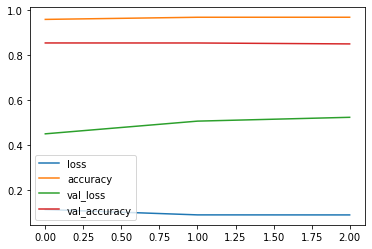

In [ ]:
import pandas as pd
pd.DataFrame(model_1_history.history).plot()

In [ ]:
model_1.evaluate(X_test,y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.5167 - accuracy: 0.8512


[0.5166775584220886, 0.8511999845504761]